#### IMPORTING NECESSARY LIBRARIES

In [11]:
import pandas as pd
import numpy as np

from kde_ebm import mixture_model
from kde_ebm import mcmc
from kde_ebm import plotting
from kde_ebm import datasets
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### READING SYNTHETIC DATASET

In [12]:
X, Y, biomarker_name, condition_name = datasets.load_synthetic('synthetic_1500_10.csv')

#### FITTING GAUSSIAN MIXTURE MODEL FOR EACH BIOMARKER AND PLOTTING THE RESULTS

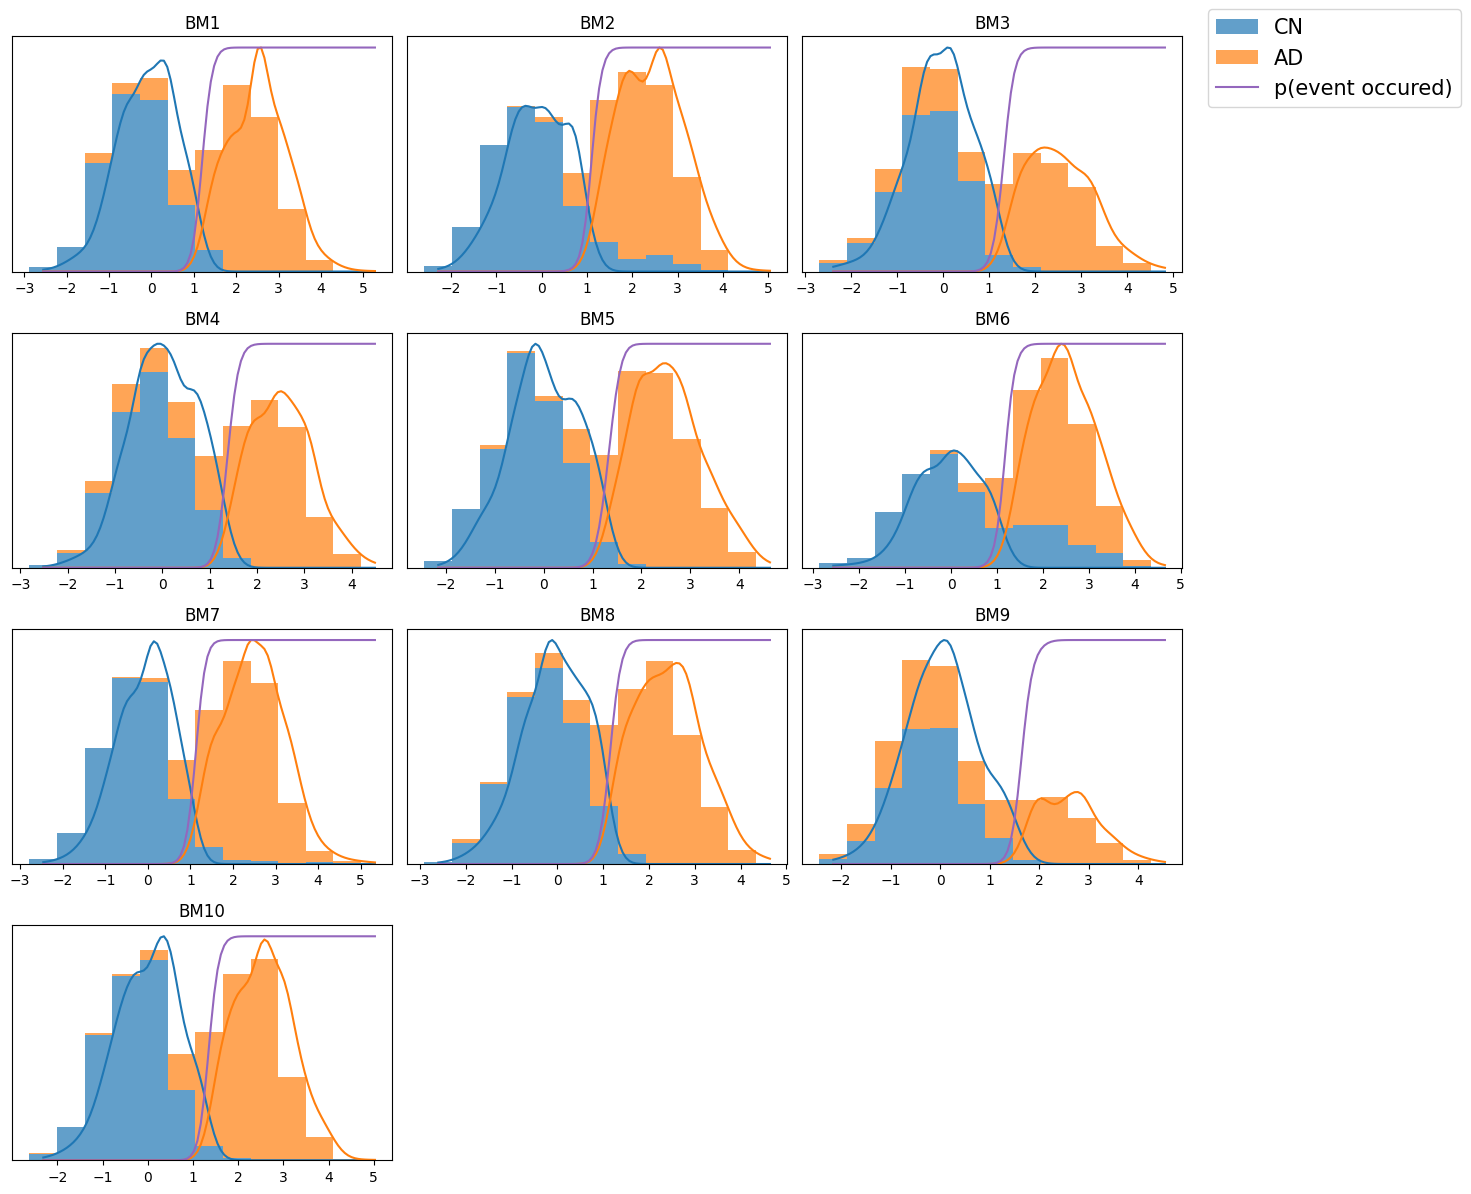

In [13]:
gmm = mixture_model.fit_all_kde_models(X, Y)
fig, ax = plotting.mixture_model_grid(X, Y, gmm,score_names=biomarker_name,class_names=condition_name)
fig.show()

#### FITTING DISEASE SEQUENCE BY GREEDY ASCENT FOLLOWED BY MCMC

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1796.28it/s]


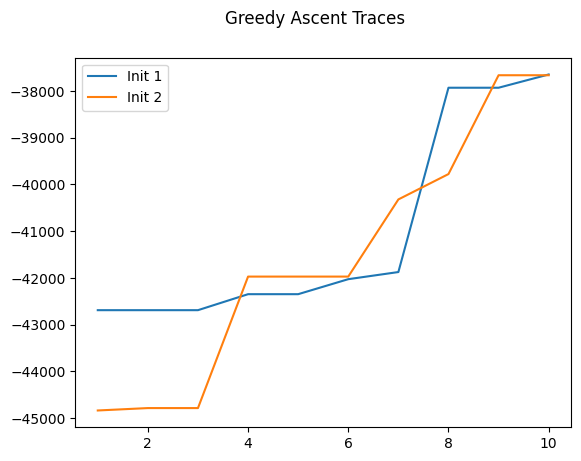

In [14]:
samples = mcmc.mcmc(X, gmm, n_iter=200, greedy_n_iter=10, greedy_n_init=2)

#### POSITIONAL VARIANCE DIAGRAM

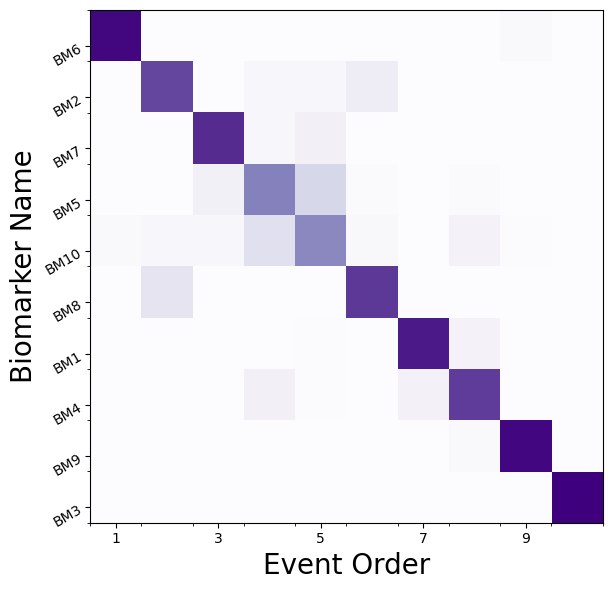

In [15]:
samples.sort(reverse=True)
max_likelihood_order = samples[0]

fig, ax = plotting.mcmc_uncert_mat(samples, score_names=biomarker_name)
fig.show()

In [16]:
bs_samples = mcmc.bootstrap_ebm(X, Y, n_mcmc_iter=200, n_bootstrap=10, greedy_n_init=2, greedy_n_iter=10)

Bootstrap 1 of 10: refitting mixtures


100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1106.85it/s]


Bootstrap 2 of 10: refitting mixtures


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 923.01it/s]


Bootstrap 3 of 10: refitting mixtures


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 973.57it/s]


Bootstrap 4 of 10: refitting mixtures


100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1532.21it/s]


Bootstrap 5 of 10: refitting mixtures


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 981.22it/s]


Bootstrap 6 of 10: refitting mixtures


100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1549.59it/s]


Bootstrap 7 of 10: refitting mixtures


100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1019.18it/s]


Bootstrap 8 of 10: refitting mixtures


100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1177.23it/s]


Bootstrap 9 of 10: refitting mixtures


100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1019.84it/s]


Bootstrap 10 of 10: refitting mixtures


100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1862.73it/s]


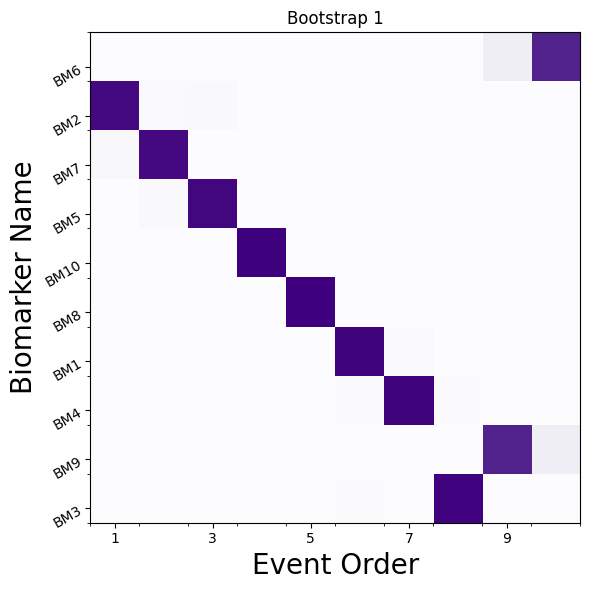

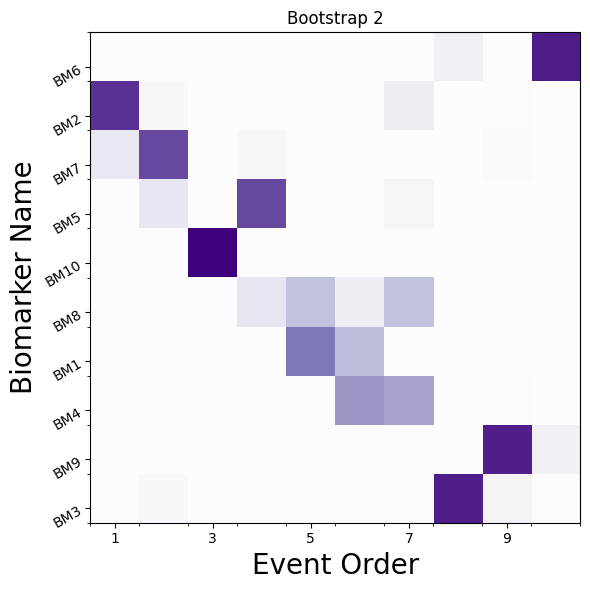

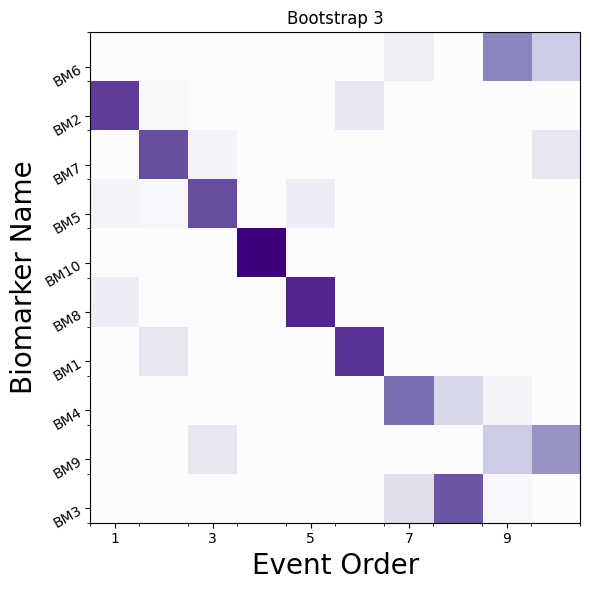

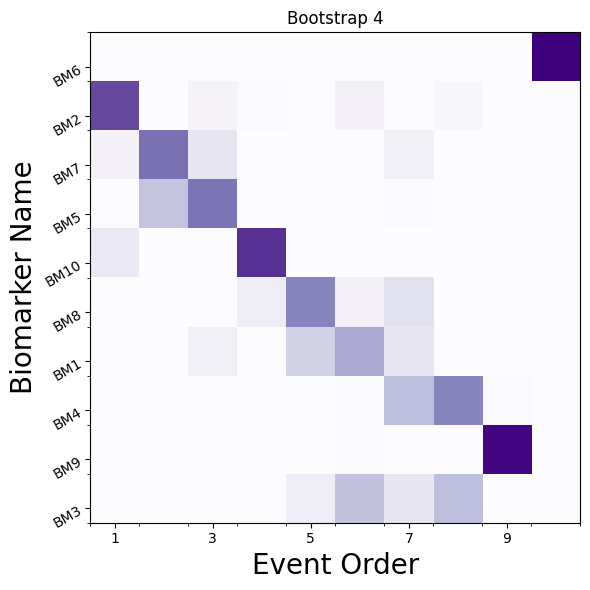

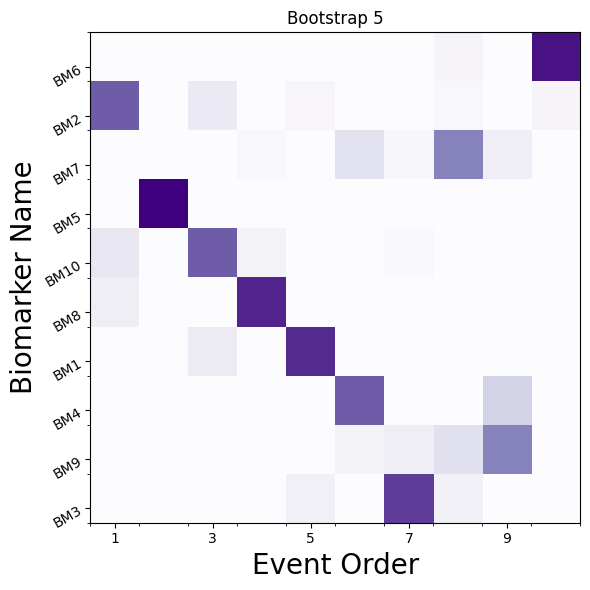

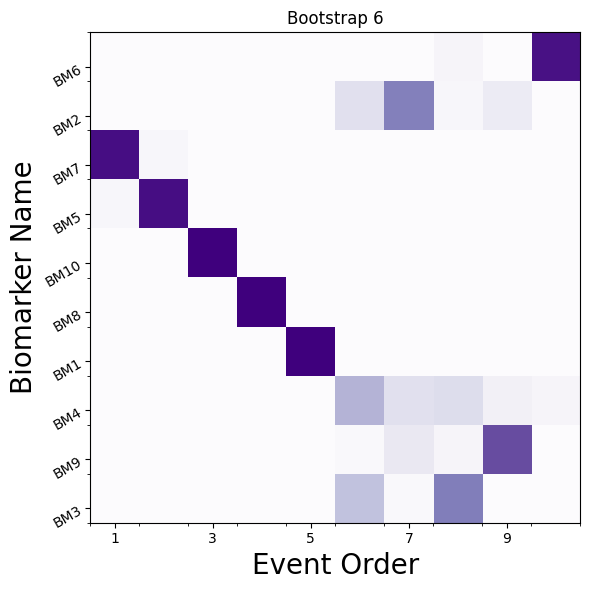

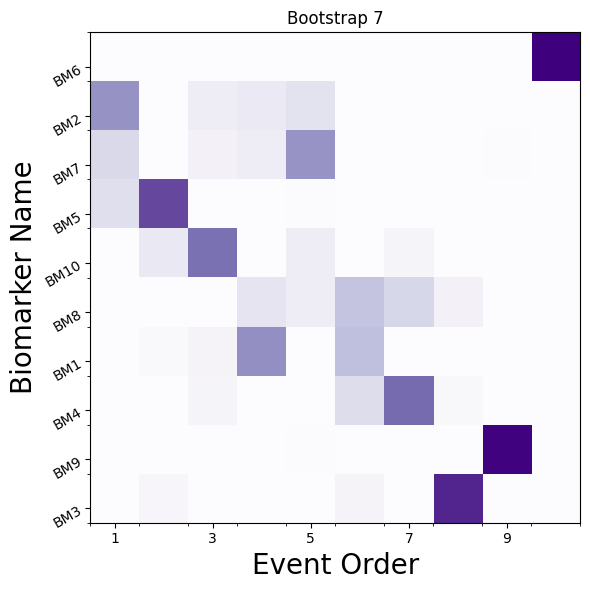

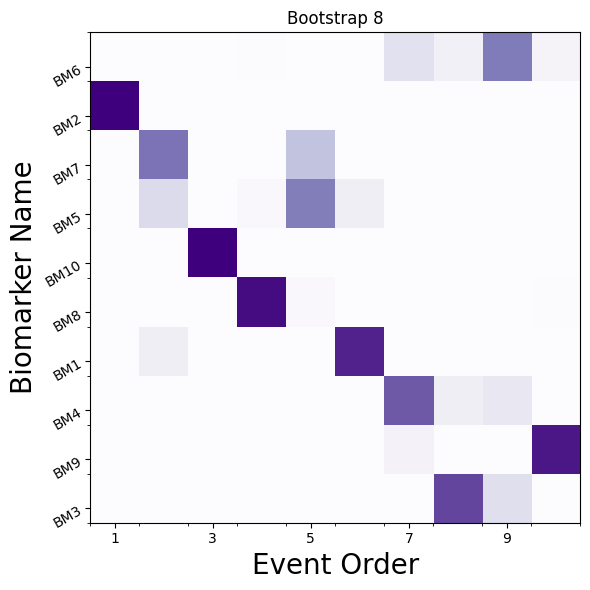

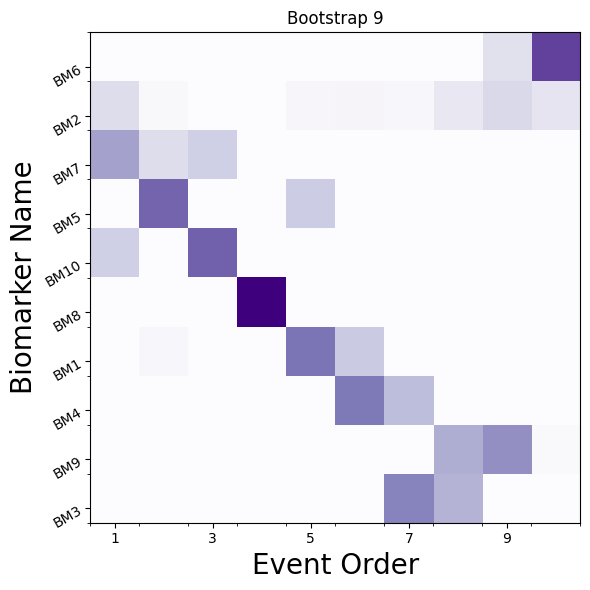

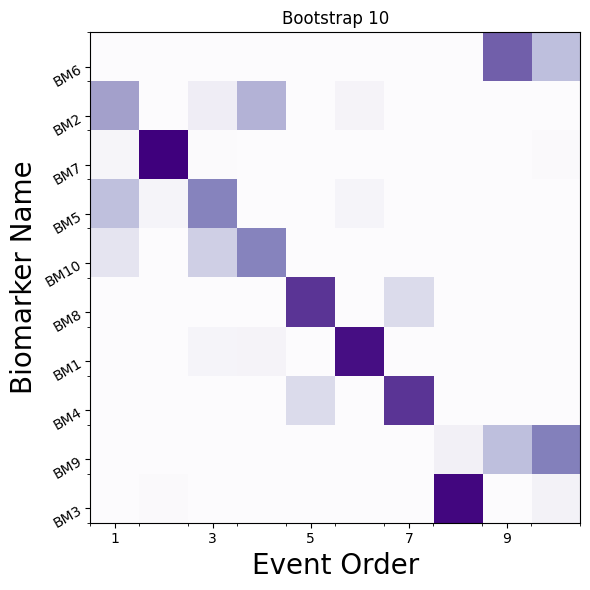

In [17]:
for bs_k,bs in enumerate(bs_samples):
    fig, ax = plotting.mcmc_uncert_mat(bs, ml_order=max_likelihood_order, score_names=biomarker_name)
    ax.set_title(f"Bootstrap {bs_k+1}")
    fig.tight_layout()
    fig.show()
    
plt.show()